<a href="https://www.kaggle.com/code/rizkynindra/face-expression-recognizer?scriptVersionId=175558169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

di project kali ini kita akan membuat model klasifikasi untuk membedakan ekspresi wajah dan mengimplementasikannya ke data realtime. Project kali ini kita akan kembali menggunakan dataset berupa gambar, lebih tepatnya gambar wajah manusia. Facial expression recognition adalah teknologi yang menggunakan gesture pada biometrik untuk mendeteksi emosi pada manusia. Emosi yang dideteksi diantaranya happiness, sadness, anger, surprise, fear, and disgust. Dengan facial expression kita bisa mengetahui secara tersirat kondisi dari orang tersebut. Ibaratnya, kita bisa tau kondisinya apakah lagi bahagia, sedih, depresi, dan lain sebagainya. 

Untuk datasetnya sendiri bisa di download melalui link dropbox dengan cara seperti dibawah ini:

In [2]:
!wget https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip

--2024-05-04 03:44:32--  https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/si11cws2pyho1bp/archive.zip [following]
--2024-05-04 03:44:32--  https://www.dropbox.com/s/raw/si11cws2pyho1bp/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce5bc44954b7f51a137db31d98d.dl.dropboxusercontent.com/cd/0/inline/CSMXnY_o4-m6orF_2BdbeaSrEvl0iSppzUJ-iPuRzbZhqKUMQ4YK0xMKkZmpjn1zgVUzQSOVib4v7AIMcqmiQYnHKmBS466RV4oZfxoMR_L3qWbcN7r_a6sBqO_rNnHhT4MJc-sKKUO0mIUmseVQggwM/file# [following]
--2024-05-04 03:44:33--  https://uce5bc44954b7f51a137db31d98d.dl.dropboxusercontent.com/cd/0/inline/CSMXnY_o4-m6orF_2BdbeaSrEvl0iSppzUJ-iPuRzbZhqKUMQ4YK0xMKkZmpjn1zgVUzQSOVib4v7AIMcqmiQYnHKmBS466RV4oZfxoMR

Kalau sudah jangan lupa di unzip supaya datanya bisa terbaca.

In [3]:
!unzip -q "/kaggle/working/archive.zip"

setelah di unzip, maka kalian akan menemukan 2 folder baru yaitu 'train' dan 'test'. Selanjutnya silakan import library "Path" agar kita bisa mengakses isi dari masing - masing folder 'train' dan 'test'

In [4]:
#import required for this project
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [5]:
#creating the pathlib PATH objects
train_path = Path("/kaggle/working/train")
test_path = Path("/kaggle/working/test")

kita coba ambil sampel dari folder 'train' dan bisa kalian lihat isi dari datasetnya berupa gambar dengan format .jpg. Selanjutnya kita ambil label dari masing - masing gambar yang mewakili. Kalau kalian perhatikan, labelnya adalah nama folder sebelum file gambarnya. Untuk mengambil labelnya, silakan buat fungsi seperti dibawah ini. Oh ya, hasilnya mungkin akan berbeda - beda setiap kali kalian jalankan scriptnya, tapi itu ga jadi masalah selama scriptnya tetap berjalan.

In [6]:
#Getting Image paths
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x), train_image_paths))

train_image_paths[:10]

['/kaggle/working/train/neutral/Training_4992353.jpg',
 '/kaggle/working/train/neutral/Training_3545955.jpg',
 '/kaggle/working/train/neutral/Training_24990769.jpg',
 '/kaggle/working/train/neutral/Training_50114489.jpg',
 '/kaggle/working/train/neutral/Training_3792144.jpg',
 '/kaggle/working/train/neutral/Training_89433834.jpg',
 '/kaggle/working/train/neutral/Training_34916637.jpg',
 '/kaggle/working/train/neutral/Training_52167263.jpg',
 '/kaggle/working/train/neutral/Training_59489569.jpg',
 '/kaggle/working/train/neutral/Training_48228969.jpg']

In [7]:
# get their respective labels

def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x), train_image_paths))
train_image_labels[:10]

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

Setelah kita tahu labelnya, langsung kita konversi labelnya menjadi angka dengan menggunakan LabelEncoder. Hal ini dilakukan karena deep learning tidak bisa memproses atau membaca label yang berbentuk string.

In [8]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

Setelah kalian jalankan script diatas, maka akan menunjukkan angka yang mewakili masing - masing label. Karena kita memiliki 7 label dan perhitungan dimulai dari angka 0. Maka hasil dari label encodernya kurang lebih seperti ini:

angry : 0
disgust : 1
fear : 2
happy : 3
neutral : 4
sad : 5
surprise : 6

In [9]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)
train_image_labels[:10]

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

Karena dataset ini tidak memiliki validation data, selanjutnya kita bagi training datanya agar sebagian bisa digunakan untuk validation data. Disini saya ambil sebanyak 25% (0.25) untuk validation datanya.

In [10]:
from sklearn.model_selection import train_test_split

Train_paths, Val_paths, Train_labels, val_labels = train_test_split(train_image_paths, train_image_labels, test_size=0.25)

Oh ya, karena project ini kategorinya *multi-class classifier* , kita lakukan pengecekan untuk imbalance classnya. Hal ini bertujuan untuk melihat apakah ada kelas yang terlalu dominan dari kelas yang lainnya. Caranya, kita hitung weight dari setiap kelas yang ada. Silakan copy script dibawah ini untuk lebih jelasnya.

In [11]:
# compute class weights

classTotals = Train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e : weight for e, weight in enumerate(classWeight)}
print(class_weight)

{0: 1.8369085, 1: 15.774854, 2: 1.7431341, 3: 1.0, 4: 1.4314141, 5: 1.4952883, 6: 2.2620544}


Seperti yang terlihat pada gambar, class 1 memiliki weight yang cukup jauh dari class yang lainnya. 

In [12]:
#function used for transformation

def load(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

selanjutnya kita lakukan proses *data augmentation* dimulai dengan mendefinisikan ukuran gambar (IMG_SIZE) dan ukuran batchnya (BATCH_SIZE). Selanjutnya kita masukkan kedua ukuran tersebut kedalam sequential object. Sebagai catatan, ukuran gambar dataset ini adalah 48 x 48 pixels. Dimana ukuran ini sangat kecil. Maka dari itu ukuran gambarnya saya naikkan menjadi 96 pixels. Oh ya untuk naiknya sendiri disarankan untuk tidak terlalu tinggi guna menghindari adanya noise pada gambar.

Setelah itu kita buat perintah untuk menjalankan augmentationnya. Augmentation yang akan saya jalankan adalah RandomFlip, RandomRotation, dan RandomZoom. Untuk lebih jelasnya silakan ketik code dibawah ini.

In [13]:
#define Image size and batch size

IMG_SIZE = 96
BATCH_SIZE = 32

#Basic transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

#Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.1, -0.05))
])

Setelah selesai, kita lanjutkan membuat fungsi untuk membuat tensorflow data object. Silakan ketik dulu code dibawah.

In [14]:
#function used to create a tensorflow data object

AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths, labels, train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)
    
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    
    dataset = dataset.map(lambda image, label : load(image, label))
    dataset = dataset.map(lambda image, label : (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)
    
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        
    dataset = dataset.repeat()
    return dataset

baris ke-5 dan ke-6 bertujuan untuk mengkonversi path gambar dan label ke bentuk tensor. Selanjutnya hasil konversinya kita gabungkan dengan perintah "zip" (baris ke 11) agar dapat melakukan iterasi sekaligus. 

selanjutnya kita load image & labelnya sekaligus di resize dengan script pada baris ke 13 & 14. Setelah itu kita acak datanya dan bagi ke dalam batch. (Baris 15 & 16). Kemudian kita bisa lanjut menampilkan shape dari gambar dan label yang sudah kita buat sebelumnya dengan script dibawah ini.

In [15]:
#creating train dataset object and verifying it
train_dataset = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

(32, 96, 96, 3)
(32, 7)


Berdasarkan script diatas, shape dari gambar mewakili batch size (32), ukuran gambar (96 x 96), dan warna RGB (3). Sedangkan shape dari label mewakili batch size (32) dan jumlah label (7). Selanjutnya kita bisa melihat sampel dari gambar tersebut dengan script dibawah ini.

happy


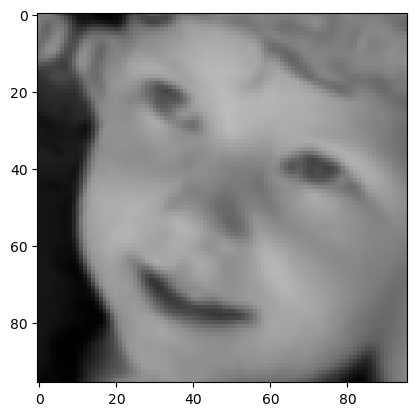

In [16]:
#view a sample of training image
print(Le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96,96,3))

saat saya jalankan scriptnya, gambar yang muncul adalah gambar dari label "surprise". Tampilan ini mungkin akan berbeda dengan saat kalian jalankan scriptnya. Tapi ga masalah, asalkan scriptnya jalan itu berarti masih aman. Oke, langkah selanjutnya kita lakukan hal yang sama untuk validation data yaitu melihat shape dari gambar dan labelnya.

In [17]:
%time val_dataset = get_dataset(Val_paths, val_labels, train = False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 27.9 ms, sys: 5.49 ms, total: 33.4 ms
Wall time: 32 ms
(32, 96, 96, 3)
(32, 7)


Dan terlihat bahwa shape dari validation data sama dengan training data. Dan sekarang kita akan masuk ke tahap berikutnya yaitu pembuatan modelnya. Disini kita akan menggunakan EfficientNet sebagai pre-trained modelnya. EfficientNet sendiri adalah salah satu pre-trained model CNN yang dikembangkan oleh Google pada tahun 2019. EfficientNet termasuk salah satu teknik transfer learning yang dikhususkan untuk pengenalan objek atau klasifikasi gambar. Untuk penggunaannya silakan ketik script dibawah ini.

In [18]:
#building efficientNet model
from tensorflow.keras.applications import EfficientNetV2B2

backbone = EfficientNetV2B2(
    input_shape=(96,96,3),
    include_top=False)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

35839040/35839040 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 3, 3, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 128)               180352    
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                       

Dikarenakan target dari project ini adalah multi class classification, maka activation yang kita gunakan adalah softmax. Langkah selanjutnya, kita compile model tersebut dengan menambahkan optimizer 'Adam' dengan learning rate=0,001, beta_1=0,9. Untuk epochsnya disini saya set 10, jika kalian ingin berbeda silakan menyesuaikan.

In [19]:
#compiling your model by providing the optimizer, loss and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

In [20]:
#Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/10


2024-05-04 03:45:22.554441: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetv2-b2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


672/672 [==============================] - 136s 98ms/step - loss: 2.8183 - accuracy: 0.3874 - precision: 0.6624 - recall: 0.1746 - val_loss: 1.3136 - val_accuracy: 0.4997 - val_precision: 0.6896 - val_recall: 0.3316
Epoch 2/10
672/672 [==============================] - 64s 95ms/step - loss: 2.4273 - accuracy: 0.4814 - precision: 0.7000 - recall: 0.2733 - val_loss: 1.2170 - val_accuracy: 0.5336 - val_precision: 0.6999 - val_recall: 0.3790
Epoch 3/10
672/672 [==============================] - 64s 95ms/step - loss: 2.2554 - accuracy: 0.5091 - precision: 0.7036 - recall: 0.3113 - val_loss: 1.2057 - val_accuracy: 0.5470 - val_precision: 0.6996 - val_recall: 0.3782
Epoch 4/10
672/672 [==============================] - 64s 94ms/step - loss: 2.1934 - accuracy: 0.5269 - precision: 0.7143 - recall: 0.3283 - val_loss: 1.1065 - val_accuracy: 0.5790 - val_precision: 0.7254 - val_recall: 0.4153
Epoch 5/10
672/672 [==============================] - 64s 95ms/step - loss: 2.1016 - accuracy: 0.5449 - pr

selanjutnya kita nonaktifkan pretrained model kita yang berada di layer 0 untuk menghindari adanya overfitting. Dilanjutkan dengan pembuatan callbacks berupa checkpoint untuk menyimpan model terbaik selama proses training dan juga menambahkan early stopping agar proses training berhenti ketika model mulai overfitting. Patience kita set 4 yang artinya jika 4 epochs berturut - turut tidak ada perkembangan maka proses training akan berhenti.

In [21]:
model.layers[0].trainable = False

In [22]:
#Defining our callbacks

checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weight.h5", verbose=1, save_best_only=True, save_weights_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 3, 3, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 128)               180352    
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 8,950,629
Trainable params: 181,255
Non-

Selanjutnya kita training lagi namun kali ini dengan menambahkan callbacks yang telah kita buat sebelumnya.

In [24]:
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    callbacks=[checkpoint, early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
    class_weight = class_weight
)

Epoch 1/10
672/672 [==============================] - ETA: 0s - loss: 1.8146 - accuracy: 0.6008 - precision: 0.7367 - recall: 0.4399
Epoch 1: val_loss improved from inf to 1.04322, saving model to best_weight.h5
672/672 [==============================] - 64s 95ms/step - loss: 1.8146 - accuracy: 0.6008 - precision: 0.7367 - recall: 0.4399 - val_loss: 1.0432 - val_accuracy: 0.6071 - val_precision: 0.7217 - val_recall: 0.4862
Epoch 2/10
672/672 [==============================] - ETA: 0s - loss: 1.7596 - accuracy: 0.6097 - precision: 0.7406 - recall: 0.4571
Epoch 2: val_loss did not improve from 1.04322
672/672 [==============================] - 63s 94ms/step - loss: 1.7596 - accuracy: 0.6097 - precision: 0.7406 - recall: 0.4571 - val_loss: 1.0522 - val_accuracy: 0.6123 - val_precision: 0.7197 - val_recall: 0.4997
Epoch 3/10
672/672 [==============================] - ETA: 0s - loss: 1.7560 - accuracy: 0.6073 - precision: 0.7415 - recall: 0.4576
Epoch 3: val_loss improved from 1.04322 to 0.

Setelah dijalankan, kita dapatkan hasilnya kurang lebih seperti ini:
* Accuracy: 0.6
* precision: 0.7
* recall: 0.5
* Val Accuracy: 0.6
* Val Precisiion: 0.7
* Val Recall: 0.5

Nah, selanjutnya kita masuk ke tahap evaluasi modelnya untuk mengetahui bagaimana performa model kita.

In [25]:
# import keras

# print(keras.__version__)
# print(tf.__version__)

In [26]:
# model.load_weights("best_weight.h5")

Kita akan membuat dataset object untuk menampung data - data yang kita gunakan dalam pengujian. Silakan tulis script di bawah ini.

In [27]:
#create a dataset object for 'testing' set 

test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x), test_image_paths))
test_labels = list(map(lambda x : get_label(x), test_image_paths))

test_labels = Le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

def decode_image(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [96,96], method="bilinear")
    return image, label

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

Penjelasan dari line of codenya adalah sebagai berikut:

* Baris ke 3 - 5 adalah code untuk mengambil path directory testing dataset kita, lalu mengkonversinya ke bentuk string dan mengambil labelnya.
* Baris ke 7 adalah code untuk mentransform labelnya menjadi bentuk integer
* Baris ke 8 adalah code untuk mengencode labelnya.
* Baris ke 10 - 11 adalah proses untuk mengkonversi datasetnya menjadi bentuk tensor.
* Baris 13 - 17 adalah pembuatan fungsi untuk mengambil gambarnya yang selanjutnya kita resize dengan resolusi 96x96
* Baris 19 - 23 adalah pembuatan test dataset yang sumbernya kita ambil dari path data testing yang sudah kita deklarasikan sebelumnya.

Selanjutnya mari kita lihat test dataset yang sudah kita buat dengan script dibawah ini.

In [28]:
#verify test dataset object
image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 96, 96, 3)
(32, 7)


Test dataset kita memiliki shape yang sama dengan train dataset yaitu 32 untuk batch size, ukuran gambar 96x96, dan 3 channel. Selanjutnya kita bisa lihat sample dari validation image yang kita miliki dengan script dibawah ini.

neutral


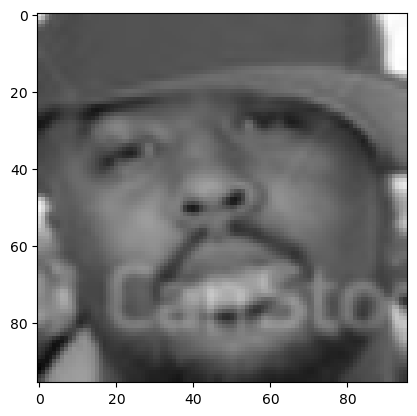

In [29]:
#view a sample validation image

print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(96, 96, 3))

Saat saya running scriptnya gambar yang ditampilkan adalah gambar dengan label surprise, mungkin akan berbeda dengan milik kalian tapi ga masalah selama scriptnya tidak menampilkan pesan error. Next, kita akan evaluasi modelnya untuk mengetahui nilai akurasi, presisi dan recall dari test dataset.

In [30]:
# evaluating the loaded model

loss, acc, prec, rec = model.evaluate(test_dataset)

print("Testing Accuracy:", acc)
print("Testing Precision:", prec)
print("Testing Recall:", rec)

225/225 [==============================] - 5s 23ms/step - loss: 1.1293 - accuracy: 0.6045 - precision: 0.6887 - recall: 0.4987
Testing Accuracy: 0.6044859290122986
Testing Precision: 0.6887264251708984
Testing Recall: 0.4987461566925049


Berdasarkan hasilnya, kita bisa lihat nilai akurasi, presisi, dan recall yang didapatkan pada test dataset hampir sama dengan nilai yang didapat saat proses training. Disini kita bisa bilang bahwa model yang kita buat cukup optimal dalam memprediksi ekspresi wajah walaupun dengan kondisi dataset kita yang imbalance. Langkah terakhir silakan di ketik script dibawah ini untuk menyimpan modelnya.

In [31]:
model.save("FacialExpressionModel.h5")

In [32]:
#save label encoder

import pickle

def save_object(obj, name):
    pickle_obj = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [33]:
save_object(Le, "LabelEncoder")